In [1]:
## This is my attempt to explore and visualize Diamonds sample dataset from Seaborn library.
## I shall use three libraries  - matplotlib, pandas, numpy and seaborn.
## The objective of this project is to explore data using multiple methods and try with different visuals to get some insights from the data.

In [7]:
## Importing essential libraries

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## Load of dataset "Diamonds" from Seaborn library

diamonds = sb.load_dataset('diamonds')

In [4]:
## General information about dataframe "diamonds"
## No missing values in this dataset to deal with

diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
## General statictics of dataframe "diamonds"

diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
## Proceeding with data exploration

## Price of most expensive diamond

MaxPrice = diamonds.price.max()

print("Price of most expensive diamond is:", MaxPrice)


Price of most expensive diamond is: 18823


In [7]:
## Average price of diamonds

AvgPrice = diamonds.price.mean()

print("Average price of diamonds is:", AvgPrice)

Average price of diamonds is: 3932.799721913237


In [8]:
## Number of "ideal" cut diamonds 

NumOfIdeal = diamonds['cut'][diamonds.cut == 'Ideal'].count()

print("Number of ideal cut diamonds is:", NumOfIdeal)

Number of ideal cut diamonds is: 21551


In [9]:

## Number of different colors
## List of different colors names

NumOfColors = diamonds.color.nunique()

ListOfColors = ",".join(diamonds.color.unique().to_list())

print("There is",NumOfColors,"different colors, their names are:",ListOfColors)

There is 7 different colors, their names are: E,I,J,H,F,G,D


In [10]:
## Premium cut diamonds carat median

PremCaratMedian = diamonds[diamonds.cut == 'Premium'].carat.median()

print("Premium cut diamonds carat median is:", PremCaratMedian)

Premium cut diamonds carat median is: 0.86


In [11]:
## Average carate value of each cut group

AvgCaratOfCutTable = diamonds.groupby('cut').carat.mean().to_frame().reset_index()

print("Table of average carate value for each cut group \n\n",AvgCaratOfCutTable)

Table of average carate value for each cut group 

          cut     carat
0      Ideal  0.702837
1    Premium  0.891955
2  Very Good  0.806381
3       Good  0.849185
4       Fair  1.046137


In [12]:
## Average price for each color group

AvgPriceOfColorTable = diamonds.groupby('color').price.mean().to_frame().reset_index()

print("Table of average price for each color  \n\n",AvgPriceOfColorTable)

Table of average price for each color  

   color        price
0     D  3169.954096
1     E  3076.752475
2     F  3724.886397
3     G  3999.135671
4     H  4486.669196
5     I  5091.874954
6     J  5323.818020


C:\Users\samsu\AppData\Local\Temp\ipykernel_16740\2744668059.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diamonds.corr()
C:\Users\samsu\AppData\Local\Temp\ipykernel_16740\2744668059.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


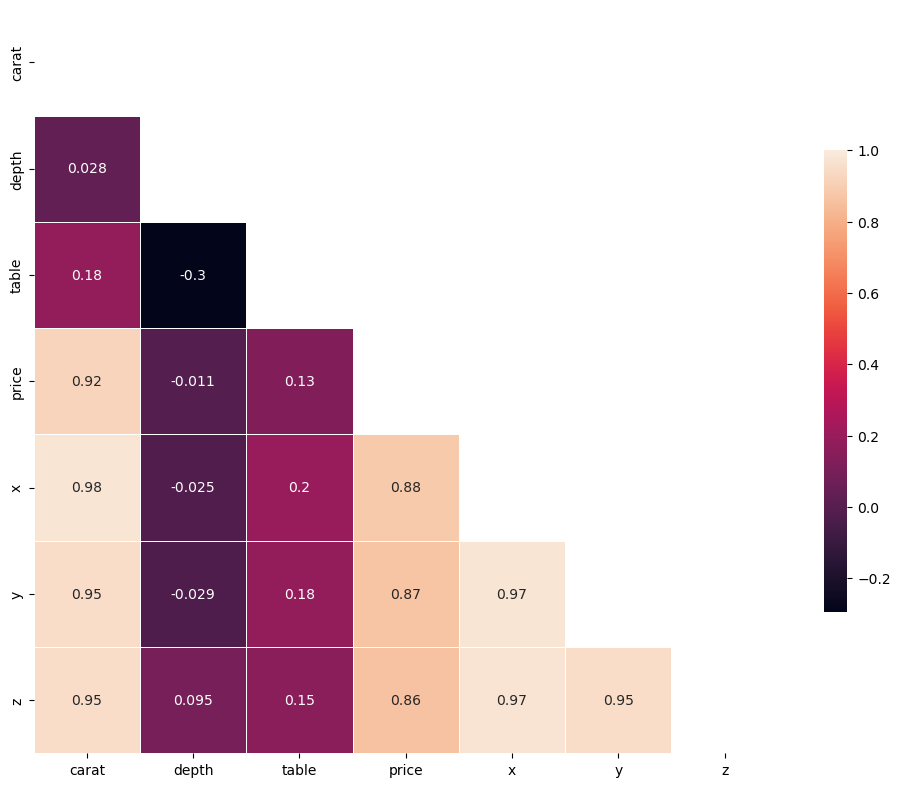

In [21]:
## Proceeding with data exploration through plotting.

##  Let's look at the corelations of the different variables in this dataset

corr = diamonds.corr()
## Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))

sb.heatmap(corr,mask = mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [ ]:
##  Insight: Clearly, price and carat has strong correlation, also they are correlated with all three size dimensions.

C:\Users\samsu\AppData\Local\Temp\ipykernel_20624\3992102755.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


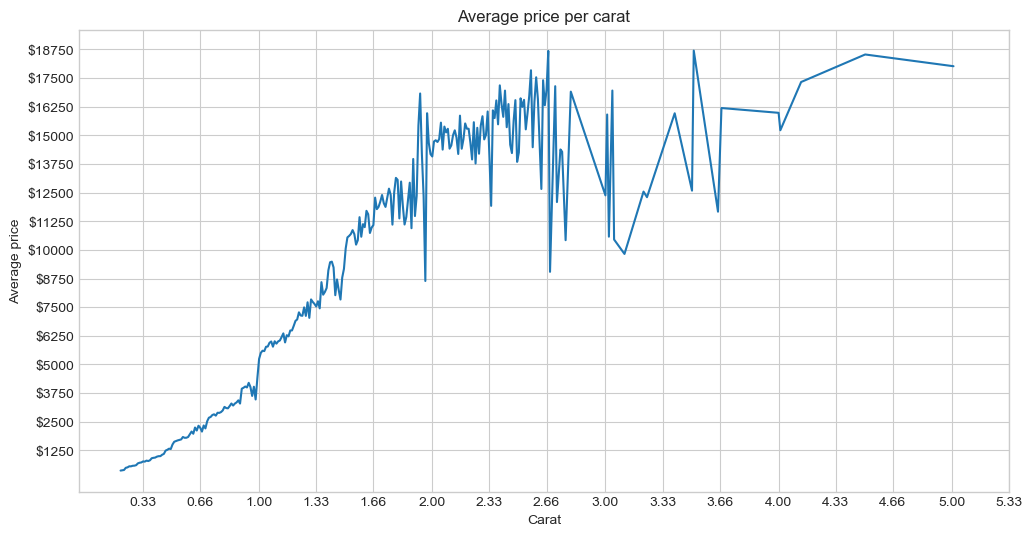

In [13]:


## Plot showing the diamond average price per carat



y = diamonds.groupby('carat').price.mean()

x = diamonds.groupby('carat').price.mean().index





plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(12,6))

plt.plot(x,y)

plt.title('Average price per carat')

plt.legend()

plt.xlabel('Carat')

plt.ylabel('Average price')

plt.xticks([0.33,0.66,1,1.33,1.66,2,2.33,2.66,3,3.33,3.66,4,4.33,4.66,5,5.33])

plt.yticks([1250,2500,3750,5000,6250,7500,8750,10000,11250,12500,13750,15000,16250,17500,18750], labels=['$1250' ,'$2500' , '$3750' , '$5000' , '$6250' , '$7500' , '$8750' , '$10000', '$11250', '$12500', '$13750', '$15000', '$16250', '$17500', '$18750' ])

plt.show()

In [ ]:
## Insight: 
## We can expect price grow as carat grows too, when the carat value is beetwen 0.33 and 2.66 or between 4 and 5 ,
## but when the carat value beetwen 2.66 and 4 there is no correlation,
## for example 1.9 carat's diamond average price is around 16750$ and 3.66 carat diamond will cost you  less then 12 000$,
## so if you want to get more carat for less money you should search between 2.66 to 4 carat 

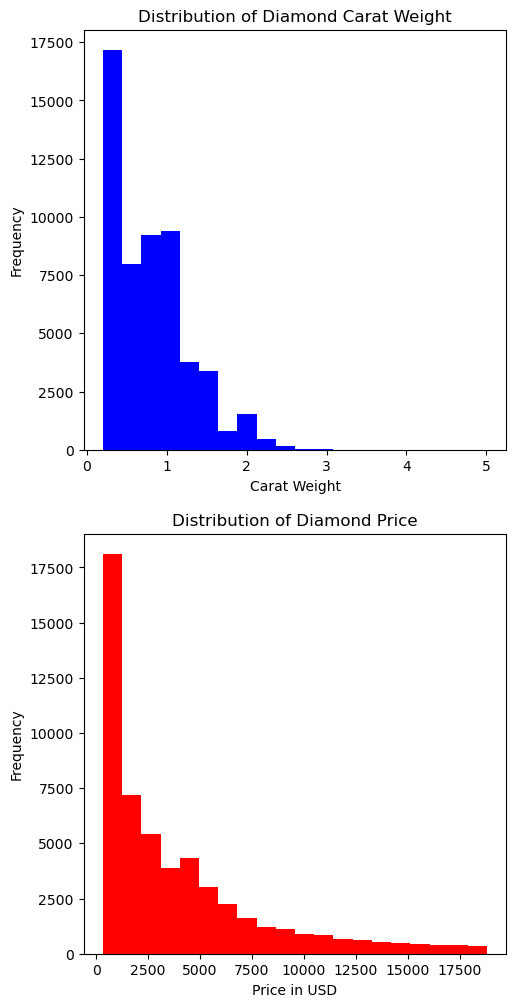

In [22]:


# First plot showing the diamond carat weight distribution
# Second plot showing the diamond price distribution


plt.figure(figsize=[12,12])

## diamond carat weight distribution
plt.subplot(221)
plt.hist(diamonds['carat'],bins=20,color='blue')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

## diamond price distribution
plt.subplot(223)
plt.hist(diamonds['price'],bins=20,color='red')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

plt.show()


In [23]:
##Insight:

## Carat weight distribution is right skewed which means that majority diamonds in this dataset have on an average low carat weight
## Similarly, diamond price is also right skewed which is again consistent with our 'Average price per carat' plot insight.
## Majority of the diamonds in this dataset have a price below 5000 USD


C:\Users\samsu\AppData\Local\Temp\ipykernel_20624\2359342198.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


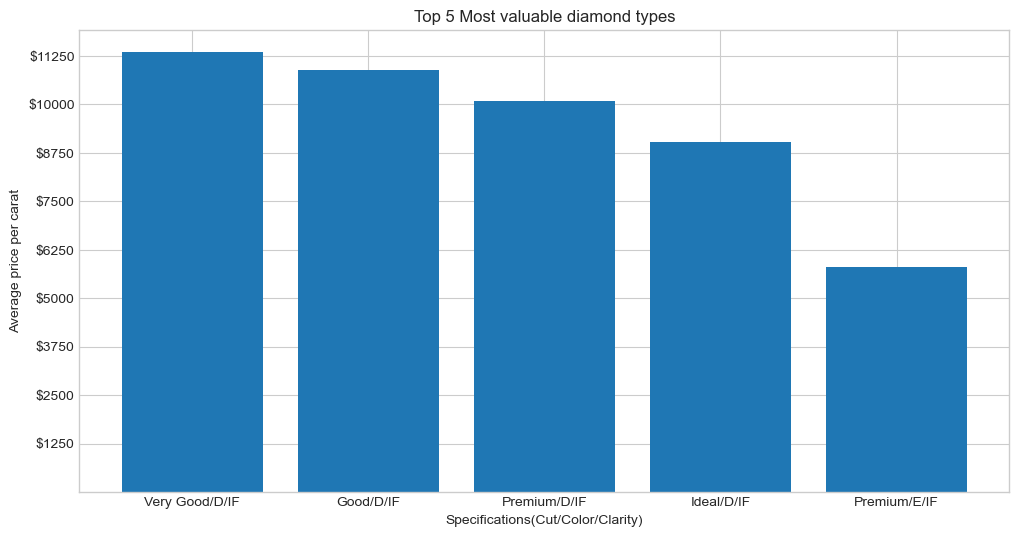

In [14]:

## Plot showing Top 5 most valuable diamonds based on price per carat and three diamond qualities: cut,color and clarity



diam_cp = diamonds

diam_cp['profit'] = diam_cp.price/diam_cp.carat

cols = ['cut', 'color', 'clarity']

diam_cp['combined'] = diam_cp[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)




x1 = diam_cp.groupby(['combined']).profit.mean().sort_values(ascending=False).head(5).index

y1 = diam_cp.groupby(['combined']).profit.mean().sort_values(ascending=False).head(5)




plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(12,6))

plt.bar(x1,y1)

plt.title('Top 5 Most valuable diamond types')

plt.xlabel('Specifications(Cut/Color/Clarity)')

plt.ylabel('Average price per carat')

plt.yticks([1250,2500,3750,5000,6250,7500,8750,10000,11250], labels=['$1250' ,'$2500' , '$3750' , '$5000' , '$6250' , '$7500' , '$8750' , '$10000', '$11250' ])

plt.show()



In [ ]:
## Insight:
## To be most valuable, diamond need to obtain next characteristics : "Very Good" cutting , "D" color and "IF" clarity

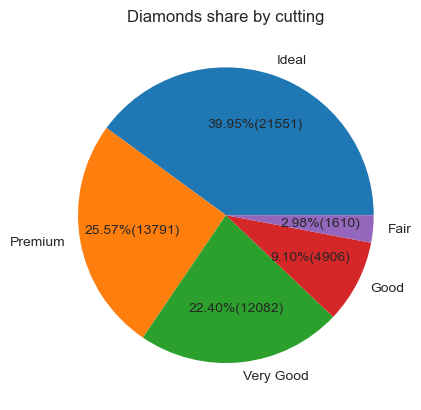

In [15]:

## Plot shows diamonds share by their cutting from total amount of diamonds



NumOfCuts = diam_cp.groupby('cut').x.count()



plt.pie(NumOfCuts, labels = NumOfCuts.index,labeldistance = 1.1,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*NumOfCuts.sum()), pctdistance = 0.64)

plt.title('Diamonds share by cutting')

plt.show()


In [ ]:
## Insight:
## We can see that most common diamond cut is "Ideal" it shares almost 40% of total number of diamonds,
## and most uncommond diamond cuts are 'Fair' and 'Good' together they share about 13% of total amount of diamonds